# IC Intro To Data Visualization with Python Exercise Part 2

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Merging Customers and Orders_Products_Merged
## 04. Creating Visualizations - Prices, Days, Hours, and Loyalty
## 05. Creating Visualizations - Customer Demographics
## 06. Export Charts and Data

## --

## 01. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
#Assigning path for import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A4_Python_Fundamentals_for_Data_Analysts\Instacart Basket Analysis_10_2023'

In [3]:
#Importing customers data
cust = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'customers_checked.pkl'))

In [4]:
#Importing orders_products_merged data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_merged_final.pkl'))

In [5]:
#Checking customers import with shape
cust.shape

(206209, 7)

In [6]:
#Checking customers import with head
cust.head()

,user_id,state,age,date_joined,number_of_dependants,family_status,income
0,26711,Missouri,48,1/1/2017,3,married,165665
1,33890,New Mexico,36,1/1/2017,0,single,59285
2,65803,Idaho,35,1/1/2017,2,married,99568
3,125935,Iowa,40,1/1/2017,0,single,42049
4,130797,Maryland,26,1/1/2017,1,married,40374


In [7]:
#Checking orders_products_merged import with shape
ords_prods_merge.shape

(32435059, 23)

In [8]:
#Checking orders_products_merged import with head
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,average_days_since_prior_order,frequency_flag
0,2539329,1,1.0,2.0,8.0,NaN,196,1.0,0.0,both,...,9.0,Mid-range product,Regular Days,Average Orders,10.0,New Customer,14.0,High Spender,30.0,Non-frequent Customer
1,2398795,1,2.0,3.0,7.0,15.0,196,1.0,1.0,both,...,9.0,Mid-range product,Slowest Days,Average Orders,10.0,New Customer,14.0,High Spender,30.0,Non-frequent Customer
2,473747,1,3.0,3.0,12.0,21.0,196,1.0,1.0,both,...,9.0,Mid-range product,Slowest Days,Most Orders,10.0,New Customer,14.0,High Spender,30.0,Non-frequent Customer
3,2254736,1,4.0,4.0,7.0,29.0,196,1.0,1.0,both,...,9.0,Mid-range product,Slowest Days,Average Orders,10.0,New Customer,14.0,High Spender,30.0,Non-frequent Customer
4,431534,1,5.0,4.0,15.0,28.0,196,1.0,1.0,both,...,9.0,Mid-range product,Slowest Days,Most Orders,10.0,New Customer,14.0,High Spender,30.0,Non-frequent Customer


## 03. Merging Customers and Orders_Products_Merged

In [9]:
#Outer join on customers and orders_products_merged
ords_prods_cust = cust.merge(ords_prods_merge, on = 'user_id', how = 'outer')

In [10]:
#Checking merge with value_counts
ords_prods_cust['_merge'].value_counts()

_merge
both          32435059
left_only            0
right_only           0
Name: count, dtype: int64

In [11]:
#Checking merge with shape
ords_prods_cust.shape

(32435059, 29)

## 04. Creating Visualizations - Prices, Days, Hours, and Loyalty

### Bar chart of 'orders_by_day_of_week'.

Text(0, 0.5, 'Number of Orders (In millions)')

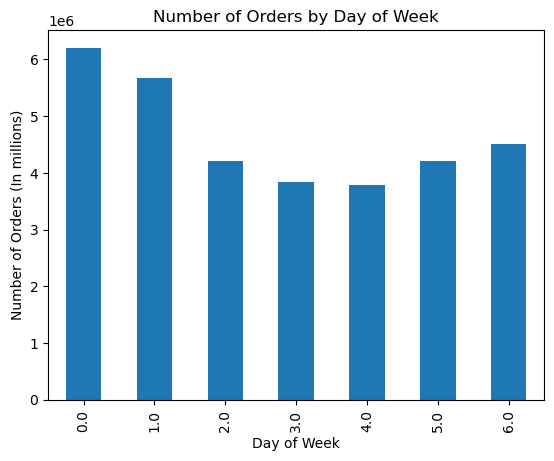

In [13]:
#Bar chart sorted by days of week
bar_days = ords_prods_cust['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders (In millions)')

### Scatterplot of 'prices'.

In [ ]:
#Scatterplot of prices
hist_prices = ords_prods_cust['prices'].plot.hist(bins = 25)

### Line chart of prices' over 'order_day_of_week' using a subset.

In [17]:
#Assigning random number to data to make sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [18]:
#Splitting numbers into two sample groups
big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [19]:
#Checking sample groups
len(ords_prods_cust)

32435059

In [20]:
len(big) + len(small)

32435059

In [ ]:
#Creating subset of data with sample and columns needed for line chart
line_set = small[['order_day_of_week', 'prices']]

In [ ]:
#Creating line chart using line_set
line = sns.lineplot(data = line_set, x = 'order_day_of_week', y = 'prices')

### A histogram of the 'order_hour_of_day'.

Text(0, 0.5, 'Number of Orders (In millions)')

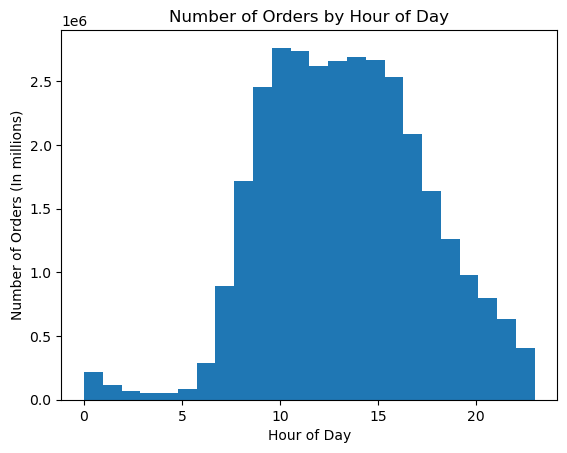

In [15]:
#Creating histogram of order_hour_of_day
hist_hour = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders (In millions)')

### This histogram shows how frequently a hour shows up in our data. The most frequent hours are in the center of the graph, from hour 10 - 16. Since order_hour_of_day means the hour of the day an order is placed, we can infer that the most popular time for orders to be placed are from 10 - 16 (10AM - 4PM).

### Bar chart of the 'loyalty_flag'.

Text(0, 0.5, 'Number of Customers (In Ten Millions)')

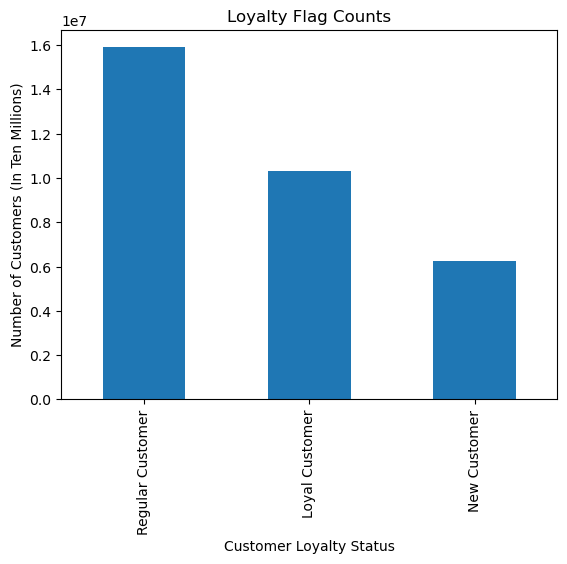

In [37]:
#Creating bar chart of loyalty_flag
bar_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
plt.title('Loyalty Flag Counts')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Number of Customers (In Ten Millions)')

### Most customers are considered a Regular Customer, followed by Loyal Customer and then New Customer.

### Line graph of 'prices' over 'order_hour_of_day'. 

In [21]:
#Using previously created small sample with order_hour_of_day and prices in new subset
line_hour_set = small[['order_hour_of_day', 'prices']]

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0, 0.5, 'Revenue')

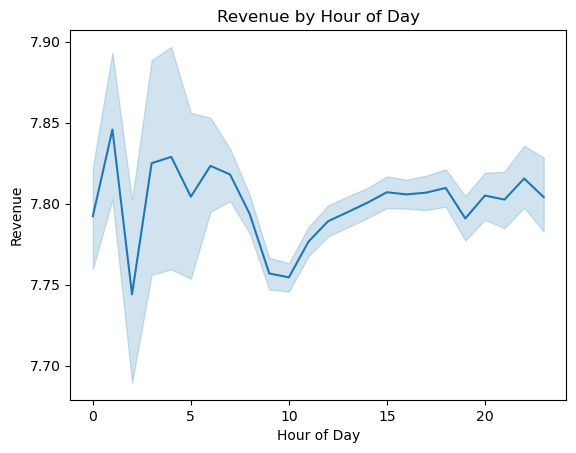

In [26]:
#Using new line_hour_set subset for line chart
line_hour = sns.lineplot(data = line_hour_set, x = 'order_hour_of_day', y = 'prices')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')

### Even though the most popular order time is 10 - 16, the price of the order is low around hour 10 and highest around hour 1 and 4.

### Price Label Frequency Chart

Text(0, 0.5, 'Number of Products (In Ten Millions)')

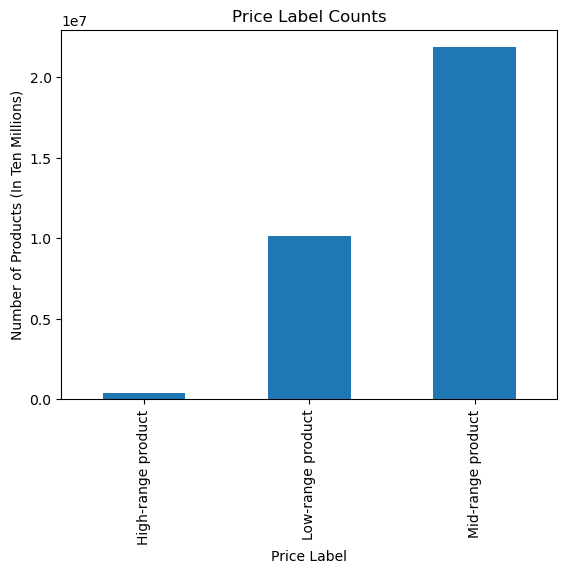

In [29]:
#Price Label Frequency Chart
price_label_bar = ords_prods_cust['price_label'].value_counts().sort_index().plot.bar()
plt.title('Price Label Counts')
plt.xlabel('Price Label')
plt.ylabel('Number of Products (In Ten Millions)')

## 05. Creating Visualizations - Customer Demographics

### Line graph to determine connection between 'age' and 'number_of_dependants'.

In [ ]:
#Using previously created small sample with age and family_status in new subset
line_age_set = small[['age', 'number_of_dependants']]

In [ ]:
#Using new line_age_set subset for line chart
line_age = sns.lineplot(data = line_age_set, x = 'age', y = 'number_of_dependants')

### There doesn't seem to be a relationship between age and number of dependants. I have also created a graph where to axes are switched to see if that would better visualize a relationship.

In [ ]:
#Line chart with axes switched
line_age_2 = sns.lineplot(data = line_age_set, x = 'number_of_dependants', y = 'age')

### With the axes swtich, it still doesn't seem like there is a relationship between age and dependants. The line decreases at 1 dependant and increases at 2 dependants, but the age range of those points are within age 49.

### Scatterplot of 'age' and 'income'.

In [ ]:
#Scatterplot of age and income
scatter_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)

### Most people across all ages have an income of less than 200,000. Those 40 and older have more people earning an income of 300,000 than those under 40. 200,000 and 300,000 seem like high income figures, and while there are some high income points it doesn't seem like the numbers are skewed by a few outliers.  

## 06. Export Charts and Data

In [31]:
#Exporting days of week bar chart
(bar_days.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_order_days_of_week.png')))

In [ ]:
#Exporting prices histogram
(hist_prices.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'histogram_prices.png')))

In [ ]:
#Exporting prices by day of week line chart
(line.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_day_prices.png')))

In [16]:
#Exporting hour of day histogram
(hist_hour.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'histogram_hour.png')))

In [38]:
#Exporting loyalty flag bar chart
(bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_loyalty.png')))

In [27]:
#Exporting hour of day and prices line chart
(line_hour.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_prices_hour.png')))

In [34]:
#Exporting price label counts bar
(price_label_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'price_label_bar.png')))

In [ ]:
#Exporting age and dependants line chart
(line_age.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_age.png')))

In [ ]:
#Exporting age and dependants line chart with axes swithced
(line_age_2.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_age_2.png')))

In [ ]:
#Exporting income and age scatterplot
(scatter_income.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'scatter_income_age.png')))

### Exporting Data

In [ ]:
#Exporting as orders_products_all
ords_prods_cust.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all.pkl'))